In [16]:
import pandas as pd
sql_records_df = pd.read_csv("sql_df_preprocessed.csv")

In [17]:
# If there are duplicates we need to drop
sql_records_df.duplicated().sum()
sql_records_df[sql_records_df.duplicated()].drop_duplicates()

,full_url,parsed_url,hostname,event_time,sql_keyword,params_length,request_volume,special_chars,values_to_length,injection


In [18]:
# If there is null we need to figure out something, lets hope this never happens
sql_records_df.isnull().sum()

full_url            0
parsed_url          0
hostname            0
event_time          0
sql_keyword         0
params_length       0
request_volume      0
special_chars       0
values_to_length    0
injection           0
dtype: int64

In [19]:
sql_records_df= sql_records_df.drop(["full_url", "parsed_url", "event_time", "hostname", "injection"], axis=1)
sql_records_df.describe()

,sql_keyword,params_length,request_volume,special_chars,values_to_length
count,21403.000000,21403.000000,21403.000000,21403.000000,21403.000000
mean,0.893800,22.431902,82.748255,0.368266,2.056936
std,1.775131,43.970680,56.724961,0.706456,3.982596
min,0.000000,1.000000,0.100000,0.000000,0.000000
25%,0.000000,2.000000,1.100000,0.000000,0.000000
50%,0.000000,2.000000,97.200000,0.000000,0.000000
75%,0.000000,30.000000,116.600000,0.000000,2.827524
max,9.000000,664.000000,166.200000,7.000000,40.000000


In [20]:
columns_values = sql_records_df.columns.values.tolist()

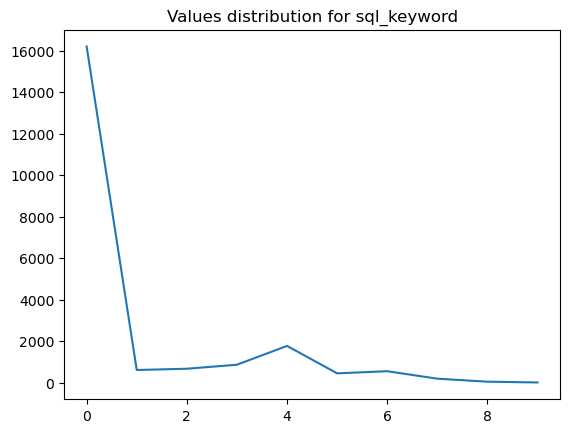

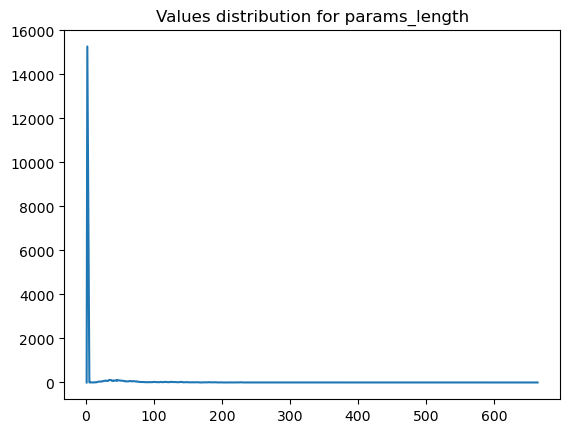

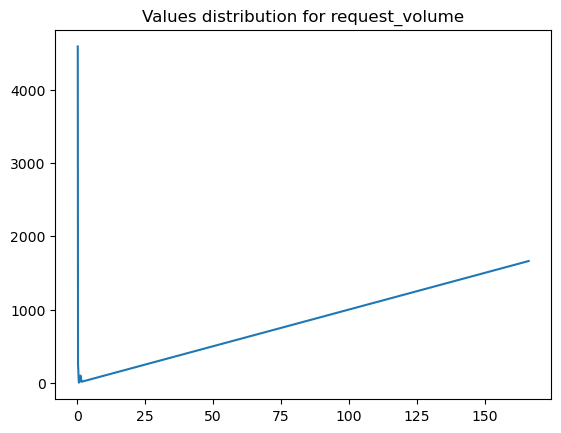

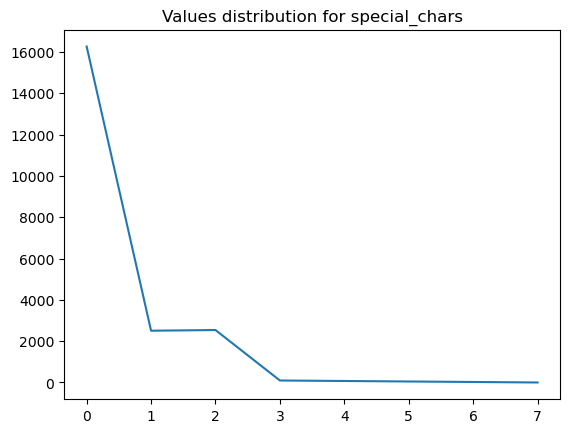

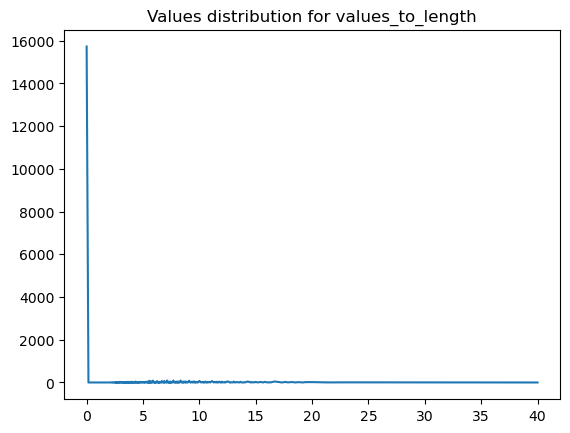

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

for col_name in columns_values:
    plt.figure()
    series_tmp = sql_records_df[col_name].value_counts().sort_index()
    plt.title(f'Values distribution for {col_name}')
    plt.plot(series_tmp.index, series_tmp.values)
    plt.savefig(f'plots/values_distribution_{col_name}.png')
    plt.show()


In [22]:
Q1 = sql_records_df.quantile(0.25)
Q3 = sql_records_df.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers_LB = (sql_records_df[IQR.index] < LB).sum()
outliers_UB = (sql_records_df[IQR.index] > UB ).sum()

out_of_bond = (outliers_LB + outliers_UB) * 100 / len(sql_records_df.index)


outliers = pd.DataFrame({'LB': LB, 'UB': UB, 'LB_outliers': outliers_LB, 
                        'UB_outliers': outliers_UB, 'Out of bond percentage' : out_of_bond})

In [23]:
outliers

,LB,UB,LB_outliers,UB_outliers,Out of bond percentage
sql_keyword,0.000000,0.000000,0,5195,24.272298
params_length,-40.000000,72.000000,0,2071,9.676214
request_volume,-172.150000,289.850000,0,0,0.000000
special_chars,0.000000,0.000000,0,5143,24.029342
values_to_length,-4.241286,7.068809,0,2915,13.619586


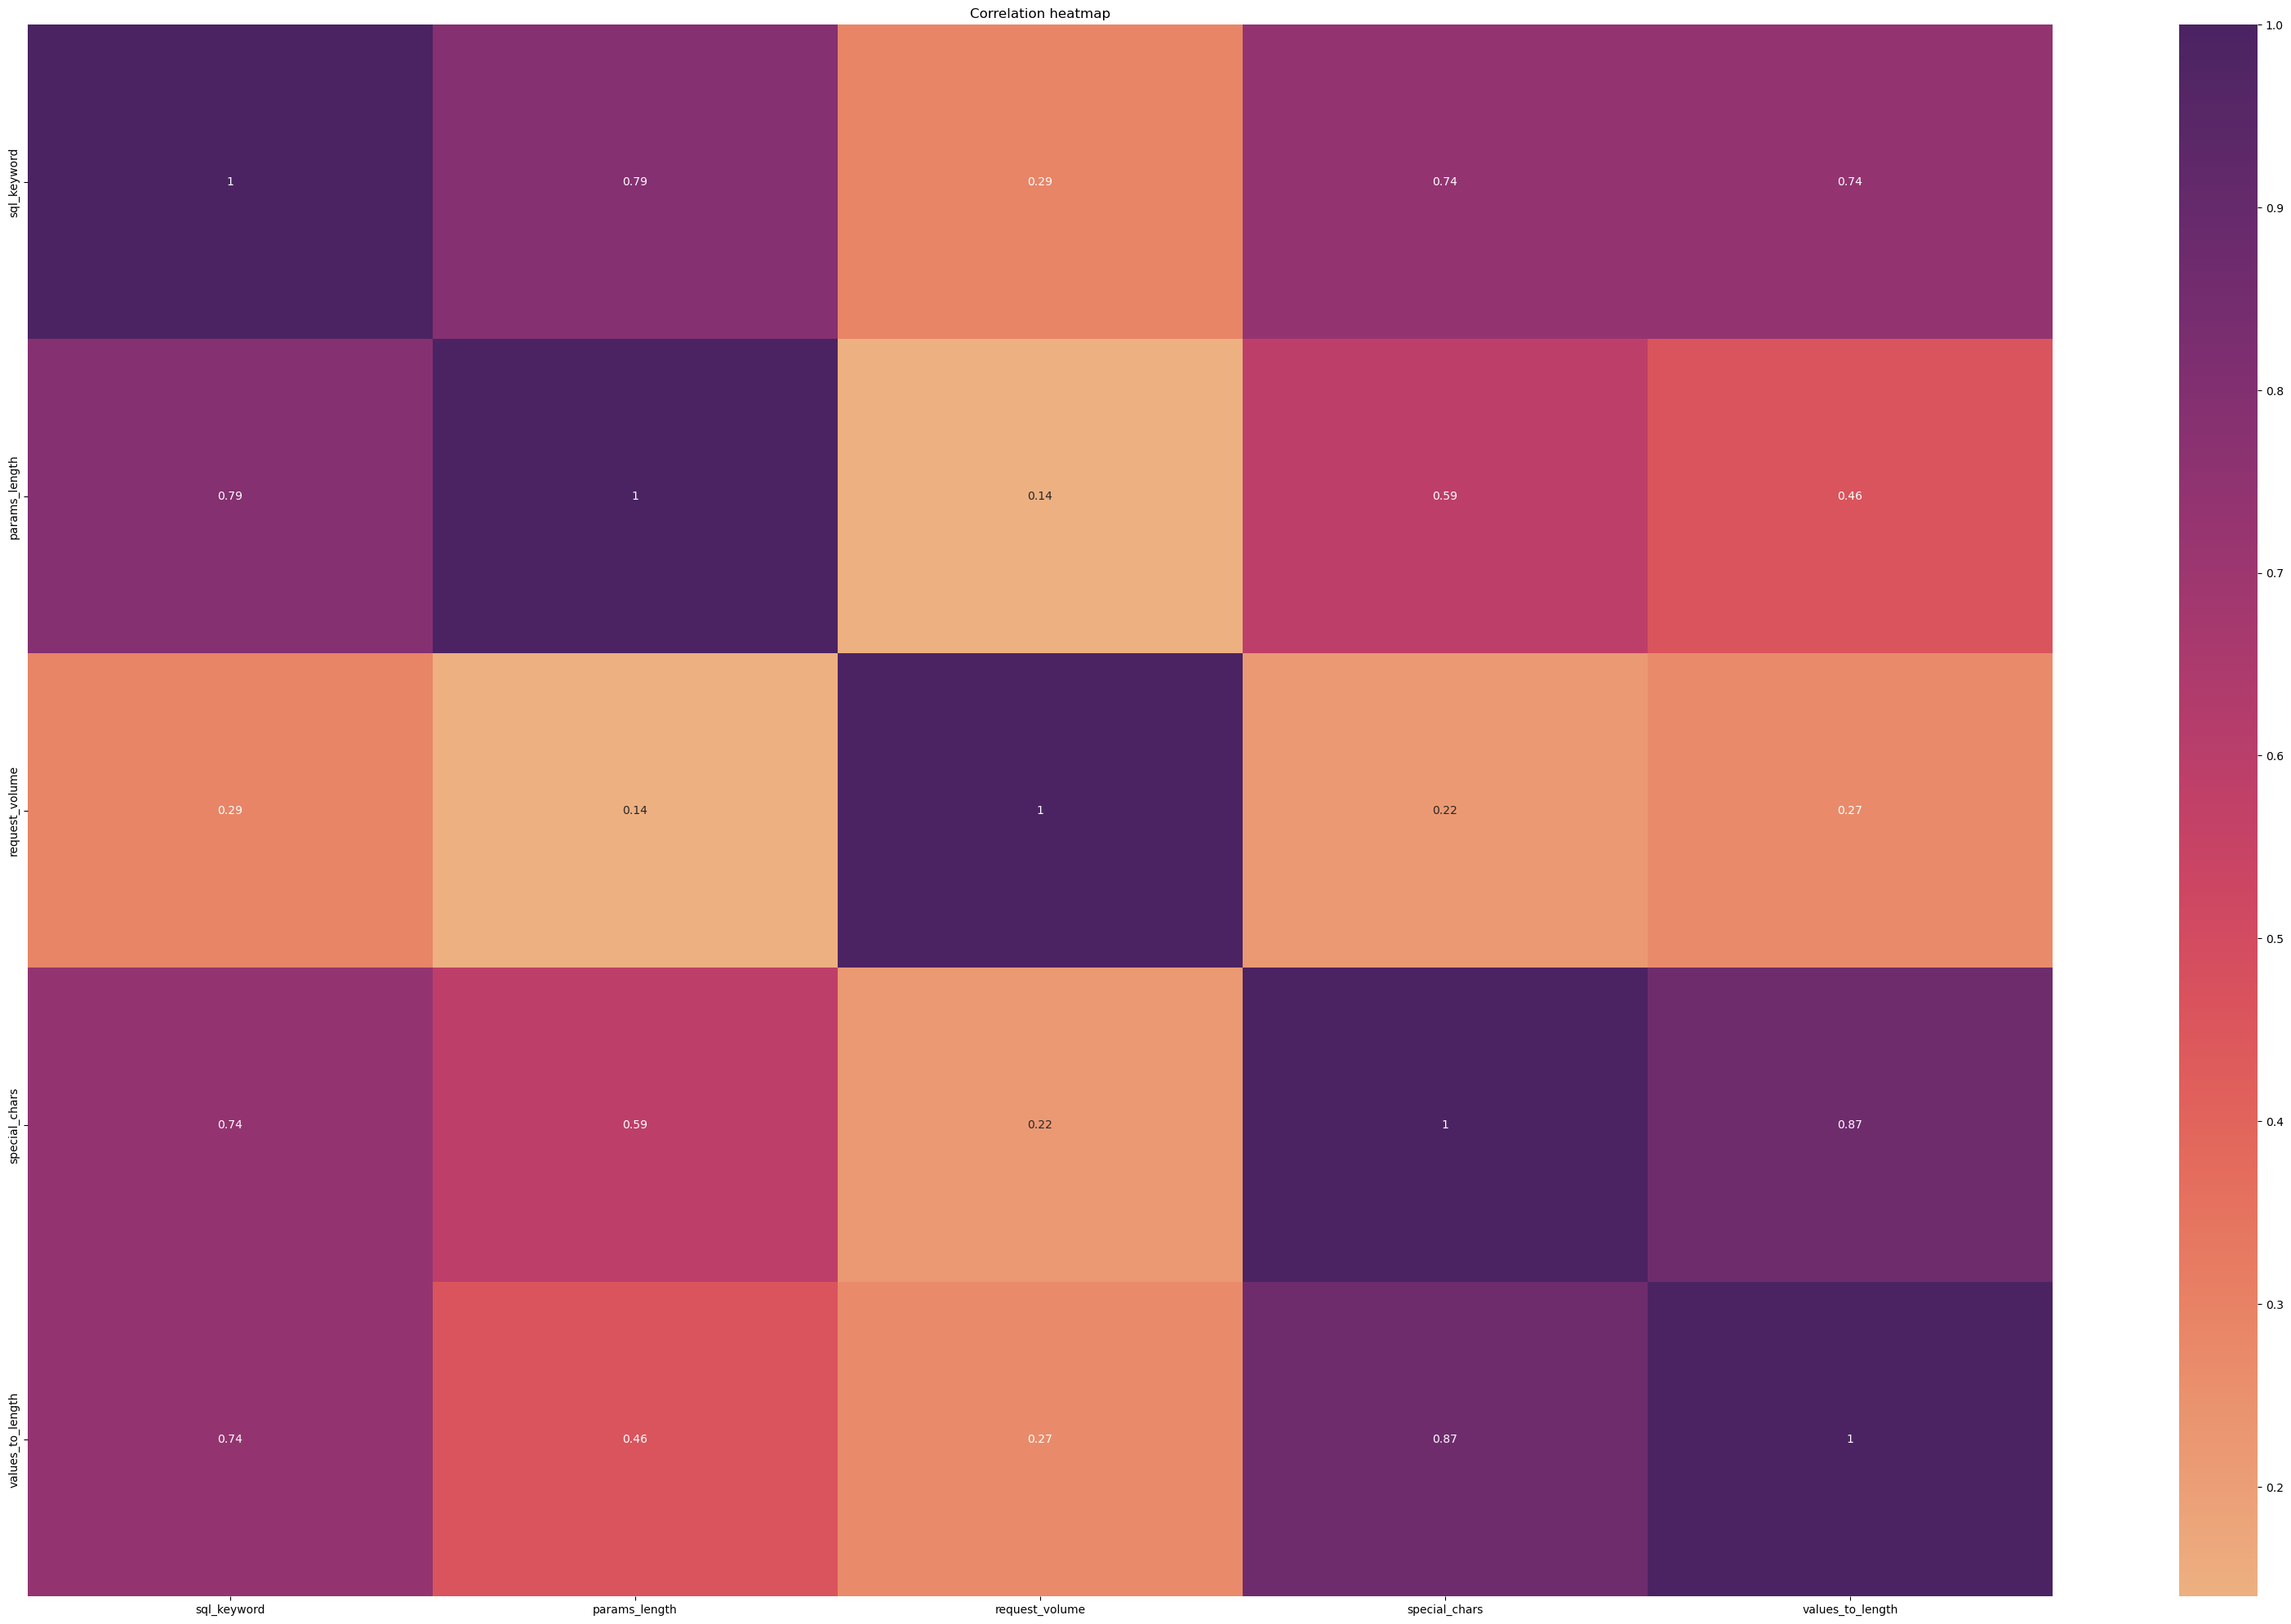

In [24]:
corr_matrix = sql_records_df.corr(method = "pearson").round(2)
plt.figure(figsize=(40,25))
sns.heatmap(corr_matrix, annot = True, cmap = 'flare')
plt.title('Correlation heatmap')
plt.savefig(f'plots/correlation_heatmap.png')
plt.show()